# In this version of the notebook, I will experiment with the rules of the theory of relativity from physics for the mathematical optimization.

-------------------------------------------------------------------------------------------------------------------

### Since, as evident from the earlier notebook, the rules of Newtonian physics don't work here, I am hopeful that Einstein will help :).

import all the required stuff for this version

In [51]:
# for print function stability
from __future__ import print_function

# for numerical computations
import numpy as np 

# for gradient calculation:
import tensorflow as tf

# for plotting diagrams:
import matplotlib.pyplot as plt

# make the diagram inline in matplotlib
%matplotlib inline

In [4]:
# define the placeholder:
x = tf.placeholder(tf.float32, shape=None)

In [5]:
# define the function for optimization
y = tf.square(x) # we use the square function

In [12]:
# plot the function:
with tf.Session() as sess:
    y_vals = [] # initialize to empty list
    for x_val in range(-100, 100):
        y_vals.append(sess.run(y, feed_dict={x: x_val}))
    # y_vals contains the y_values for the domain [-100, 100]

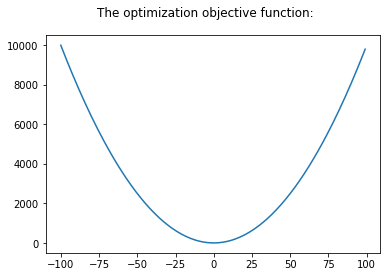

In [20]:
plt.figure().suptitle("The optimization objective function: ")
plt.plot(range(-100, 100), y_vals);

In [42]:
# define the overall structure function:
def simulate(y_value, x_value, start_position, optim_fn, no_of_iterations = 100):
    '''
        This is the structural function over the total algorithm which can swap the opim_fn to create different 
        behaviour.
        
        @params
        y_value = The optimization objective function's current value
        x_value = The current parameter value
        optim_fn = The function used for optimization
        
            @optim_fn:
                params:
                y_value = evaluated value of the simulate function's y_value
                x_value = evaluated value of the simulate function's x_value
                dy_dx = the gradient of the y wrt. x
                
                returns: The updated position
                
        @return
        final values of x_value and y_value and all the collected x_values.
    '''
    # start the TensorFlow session
    sess = tf.Session()
    
    # set the position to start position:
    position = start_position
    
    # run the simulation loop
    positions = [position] # initialize the positions list
    for _ in range(no_of_iterations):
        # evaluate the y_value and the dy_dx for current x_value
        cost, gradient = sess.run([y_value, tf.squeeze(tf.gradients(y_value, x_value))], 
                                                                  feed_dict={x_value: position})
        
        # update the position using the optimization function:
        position = optim_fn(cost, position, gradient)
        
        positions.append(position)
    
    # close the session
    sess.close()
    
    # return the last position, cost and positions:
    return position, cost, positions

In [43]:
# define the relative optimization function:
def relative_optmization(y_, x_, dy_dx_, epsilon = 3e-8):
    # calculate the updated x_ value and return it
    updated_x_ = x_ - (y_ / (dy_dx_ + epsilon))
    
    # return this value:
    return updated_x_

Optimised_position:  2.4134132049e-09
Final_cost:  6.79293e-18


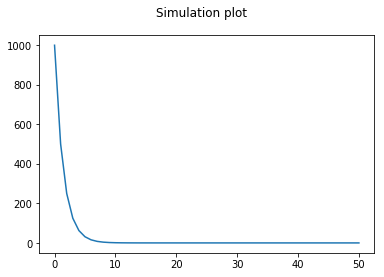

In [53]:
# run the simulation 100 times from start position 10:
last_pos, last_cost, x_vals = simulate(y, x, 1000, relative_optmization, no_of_iterations=50)

plt.figure().suptitle("Simulation plot")
plt.plot(x_vals);

# print the final values:
print("Optimised_position: ", last_pos)
print("Final_cost: ", last_cost)

# Well, The results of this optimization technique are very good on the Synthetic functions. Let's find out in subsequent Techinques how this fares on some of the typical DL datasets. 